In [1]:
with open("refined_output.txt",'rt') as refined:
    cutsites =[]
    lengths = []
    with_TSD = 0
    without_TSD = 0
    checked_loci = []
    for line in refined:
        #print(line)
        line = line.split()
        if line[3] != "+" and line[3] != "-":
            continue
        if line[8]+line[9] not in checked_loci:
            if line[11] != "N/A" and int(line[11])-int(line[10]) > 4:
                cutsites.append(line[6])
                lengths.append(int(line[11])-int(line[10])+1)
                with_TSD +=1
            else:
                without_TSD +=1
            checked_loci.append(line[8]+line[9])
        else:
            continue
print(with_TSD,without_TSD)
print(sum(lengths)/len(lengths))
print(cutsites,lengths)

212 14
15.117924528301886
['ATAAatt', 'TACACag', 'tttattg', 'ttcctcc', 'ttcttaa', 'ATgctaa', 'aatcatg', 'tgaattt', 'tttttaa', 'TGTTTAA', 'TTCTTAA', 'TTTCTGA', 'TTTATAA', 'ATTTGAA', 'ACTccac', 'tccttct', 'ttttcat', 'ATTgtaa', 'GTCTGGg', 'TTTTTGT', 'aacttgt', 'tatagtt', 'TCTTTAC', 'CACAAGa', 'aatttat', 'ttttaat', 'ACTTAGA', 'ATTCTAt', 'tttctgg', 'TTTTTAT', 'CTTTAAA', 'GGCTCta', 'ATTTGCC', 'Tatattt', 'CTCctga', 'tccttaa', 'ACCTGgg', 'gatagca', 'CAtagtt', 'gttgaag', 'ctctaaa', 'AAATTAT', 'gatgaaa', 'CTTCTAA', 'CTTCTAT', 'GGtcttc', 'ATTTAAC', 'ttaccat', 'ttttaaa', 'ATTCTAT', 'AACTTAA', 'tttttat', 'ttcaaag', 'Ttcttat', 'agttttt', 'Ttcatat', 'tagagca', 'CTTTAAA', 'ttttaaa', 'ATTTAAA', 'TTTTTAT', 'ctctaaa', 'Tttgttt', 'GCTCTCC', 'TAGAATT', 'ttttaaa', 'ATACgtt', 'gccctct', 'ttttaaa', 'ATTCAAA', 'ttttaaa', 'tttttaa', 'TTTTTAT', 'TCAGAGG', 'CTCTTAA', 'GTCTATG', 'CTCGCAT', 'GCCTTAA', 'TTCACTG', 'ATCTTAA', 'GACAGTT', 'GAATTAC', 'TATTTGT', 'TTCTTAA', 'GTTTTGA', 'CAGAAAG', 'TTTCTGA', 'CCTGGTT', 'ATTG

<module 'logomaker' from '/home/blacksmi/.local/lib/python3.9/site-packages/logomaker/__init__.py'>
212
          A         T         C         G
0  0.221698  0.476415  0.160377  0.141509
1  0.188679  0.660377  0.099057  0.051887
2  0.080189  0.599057  0.250000  0.070755
3  0.174528  0.523585  0.221698  0.080189
4  0.240566  0.523585  0.136792  0.099057
5  0.575472  0.169811  0.117925  0.136792
6  0.466981  0.353774  0.089623  0.089623


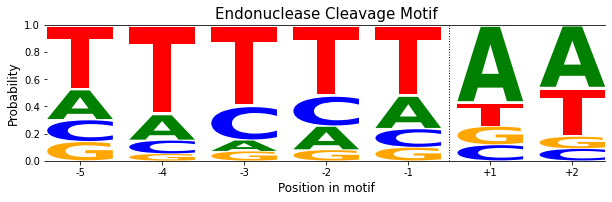

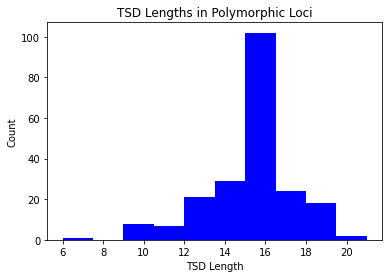

In [2]:
import logomaker
print(logomaker)
import matplotlib.pyplot as plt
import sys
import pandas as pd

endo_dict = {}
for i in range(len(cutsites[0])):
    endo_dict[i] = {"A":0,"T":0,"C":0,"G":0}
for cut_site in cutsites:
    cut_site = cut_site.upper()
    for i in range(len(cut_site)):
        endo_dict[i][cut_site[i]] +=1
        if endo_dict[i][cut_site[i]] == "N":
            sys.exit()
for key in endo_dict.keys():
    for key2 in endo_dict[key].keys():
        endo_dict[key][key2] = endo_dict[key][key2]/len(cutsites)
endo_dict
endo_pd = pd.DataFrame(endo_dict)
endo_pd = endo_pd.T
#print(endo_pd)
print(len(cutsites))

# create Logo object
ss_logo = logomaker.Logo(endo_pd,
width=.8,
vpad=.05,
stack_order='big_on_top',
color_scheme='classic')
# style using Logo methods
ss_logo.style_spines(spines=['left', 'right'], visible=False)
# style using Axes methods
ss_logo.ax.set_xticks(range(len(endo_pd)))
ss_logo.ax.set_xticklabels('%+d'%x for x in [-5, -4, -3, -2, -1, +1, +2])
ss_logo.ax.set_yticks([0,.2,.4,.6,.8, 1])
ss_logo.ax.axvline(4.5, color='k', linewidth=1, linestyle=':')
ss_logo.ax.set_ylabel('Probability',fontsize=12)
print(endo_pd)

ss_logo.ax.set_title(f'Endonuclease Cleavage Motif',fontsize=15)
ss_logo.ax.set_xlabel(f'Position in motif',fontsize=12)
#output_type = output_type.replace(",","").replace(" ","_")
plt.savefig(f'logo_{len(cutsites)}.pdf',dpi=300,bbox_inches='tight')  
plt.show()

plt.hist(lengths,color="Blue")
plt.xlabel("TSD Length")
plt.ylabel("Count")
plt.title("TSD Lengths in Polymorphic Loci")
plt.savefig(f'hist_of_TSD_lengths.pdf',dpi=300)
plt.show()